In this notebook, I validated SNODAS snow depth using qsi data. The 1km SNODAS snow depth raster file was vectorize to polygon and the pixel value is the VALUE column. Zonal Statistics operation with vectorized SNODAS polygon as input vector was performed to compute count, mean and standandard deviation of qsi pixels within the SNODAS polygon. The resulting file is saved as a csv for each sites using "Sitename_DATE_

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from scipy.stats import ttest_rel
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import polyfit

## USCOCP_20210319

In [33]:
#read the file for each sites
USCOCP_20210319 = pd.read_csv("../data_results/snow_depth/extracted_values/USCOCP_20210319_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USCOCP_20210319["SNODAS SD"] = USCOCP_20210319["VALUE"] /1000
USCOCP_20210319 = USCOCP_20210319.drop("VALUE", axis = 1)
USCOCP_20210319.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select only rows with representative pixel values
USCOCP_20210319 = USCOCP_20210319[USCOCP_20210319["_count"] > 1500000]
USCOCP_20210319.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,2.800000e+01,28.000000,28.000000,28.000000
mean,2.390021e+06,1.480424,0.449973,1.412071
std,3.114969e+05,0.130970,0.225668,0.146151
min,1.523514e+06,1.121737,0.270668,1.002000
25%,2.210170e+06,1.411067,0.309417,1.417000
50%,2.566264e+06,1.474370,0.341421,1.457000
75%,2.602878e+06,1.590766,0.510035,1.492000
max,2.611798e+06,1.711435,1.062681,1.570000


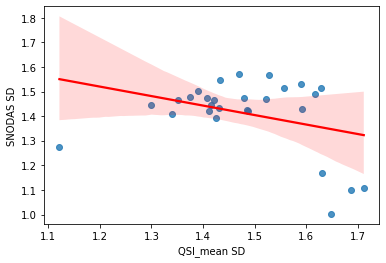

In [34]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USCOCP_20210319, line_kws={'color': 'red'})

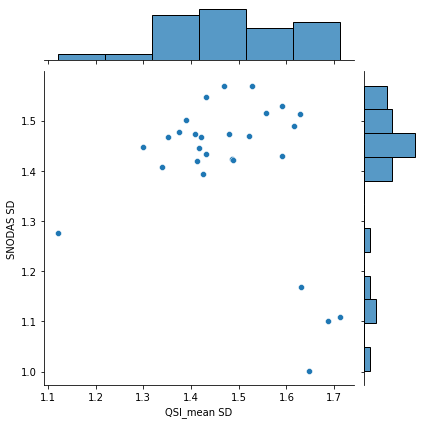

In [35]:
sns.jointplot(x="QSI_mean SD", y="SNODAS SD", data=USCOCP_20210319)

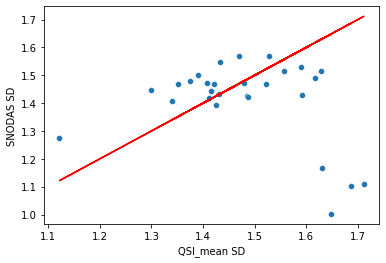

In [36]:
# b, m = polyfit(USCOCP_20210319["QSI_mean SD"], USCOCP_20210319["SNODAS SD"], 1)
# plt.plot(USCOCP_20210319["QSI_mean SD"], b + m * USCOCP_20210319["QSI_mean SD"], '-')
plt.figure()
sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USCOCP_20210319)
plt.plot(USCOCP_20210319["QSI_mean SD"], USCOCP_20210319["QSI_mean SD"], color = 'r')
plt.show()


In [37]:
ttest_rel(USCOCP_20210319['QSI_mean SD'], USCOCP_20210319['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=1.5897999125742435, pvalue=0.12352241224107777)

In [38]:
USCOCP_20210319["QSI_mean SD"].corr(USCOCP_20210319["SNODAS SD"])

-0.3460066536004935

In [39]:
print("r2 :" , r2_score(USCOCP_20210319['QSI_mean SD'], USCOCP_20210319['SNODAS SD']))

r2 : -2.2999387805321323


## USCOFR_20200211

In [40]:
#read the file for each sites
USCOFR_20200211 = pd.read_csv("../data_results/snow_depth/extracted_values/USCOFR_20200211_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USCOFR_20200211["SNODAS SD"] = USCOFR_20200211["VALUE"] /1000
USCOFR_20200211 = USCOFR_20200211.drop("VALUE", axis = 1)
USCOFR_20200211.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select only rows with representative pixel values
USCOFR_20200211 = USCOFR_20200211[USCOFR_20200211["_count"] > 1500000]
USCOFR_20200211.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,5.200000e+01,52.000000,52.000000,52.000000
mean,2.570460e+06,1.112414,0.317840,1.126346
std,1.860143e+05,0.200910,0.238139,0.182860
min,1.544132e+06,0.868615,0.187781,0.833000
25%,2.613323e+06,0.957032,0.217430,0.990750
50%,2.635698e+06,1.056797,0.233372,1.080500
75%,2.636604e+06,1.200453,0.275106,1.297500
max,2.637367e+06,1.798647,1.285283,1.484000


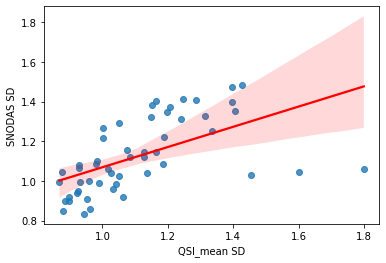

In [41]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20200211, line_kws={'color': 'red'})

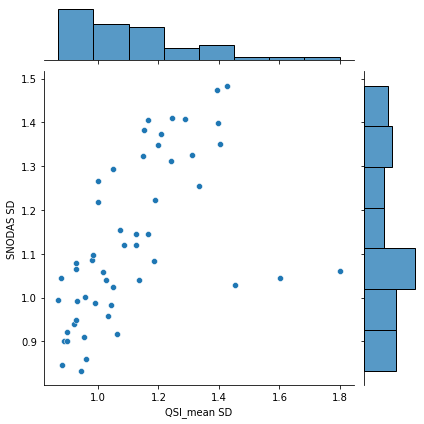

In [42]:
sns.jointplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20200211)

In [43]:
ttest_rel(USCOFR_20200211['QSI_mean SD'], USCOFR_20200211['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=-0.5566352927058617, pvalue=0.5802111142832531)

In [44]:
USCOFR_20200211["QSI_mean SD"].corr(USCOFR_20200211["SNODAS SD"])

0.5610983283126068

In [45]:
print("R2 :" , r2_score(USCOFR_20200211['QSI_mean SD'], USCOFR_20200211['SNODAS SD']))

R2 : 0.18808768219496397


## USCOFR_20210319

In [46]:
#read the file for each sites
USCOFR_20210319 = pd.read_csv("../data_results/snow_depth/extracted_values/USCOFR_20210319_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USCOFR_20210319["SNODAS SD"] = USCOFR_20210319["VALUE"] /1000
USCOFR_20210319 = USCOFR_20210319.drop("VALUE", axis = 1)
USCOFR_20210319.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select only rows with representative pixel values
USCOFR_20210319 = USCOFR_20210319[USCOFR_20210319["_count"] > 1500000]
USCOFR_20210319.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,8.800000e+01,88.000000,88.000000,88.000000
mean,2.543447e+06,0.862182,0.271825,0.989920
std,1.933843e+05,0.215640,0.171744,0.215795
min,1.780114e+06,0.557001,0.153108,0.440000
25%,2.572630e+06,0.681180,0.199900,0.847750
50%,2.627482e+06,0.808019,0.214790,1.013000
75%,2.635219e+06,1.004695,0.249809,1.174000
max,2.637230e+06,1.536580,1.130437,1.377000


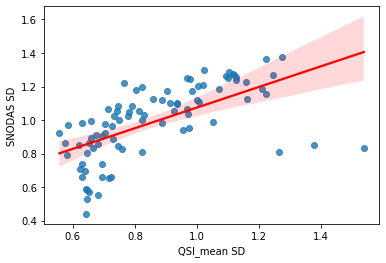

In [47]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20210319, line_kws={'color': 'red'})

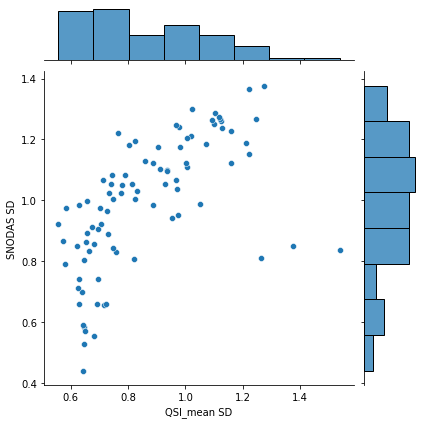

In [48]:
sns.jointplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20210319)

In [49]:
ttest_rel(USCOFR_20210319['QSI_mean SD'], USCOFR_20210319['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=-6.336938647282921, pvalue=1.0035335409589342e-08)

In [50]:
USCOFR_20210319["QSI_mean SD"].corr(USCOFR_20210319["SNODAS SD"])

0.6157934971273701

## USIDBN_20200218

In [51]:
#read the file for each sites
USIDBN_20200218 = pd.read_csv("../data_results/snow_depth/extracted_values/USIDBN_20200218_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USIDBN_20200218["SNODAS SD"] = USIDBN_20200218["VALUE"] /1000
USIDBN_20200218 = USIDBN_20200218.drop("VALUE", axis = 1)
#rename columns
USIDBN_20200218.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select pixels with many representatives
USIDBN_20200218 = USIDBN_20200218[USIDBN_20200218["_count"] > 1500000]
USIDBN_20200218.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,2.620000e+02,262.000000,262.000000,262.000000
mean,2.425200e+06,1.515876,0.339425,1.421962
std,1.349585e+05,0.308019,0.125127,0.191850
min,1.600267e+06,0.890147,0.129272,1.133000
25%,2.455064e+06,1.308451,0.257002,1.297250
50%,2.461714e+06,1.471016,0.312031,1.373500
75%,2.462997e+06,1.753243,0.399474,1.498000
max,2.466401e+06,2.411459,0.807572,2.140000


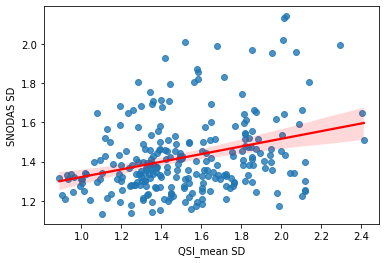

In [52]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20200218, line_kws={'color': 'red'})

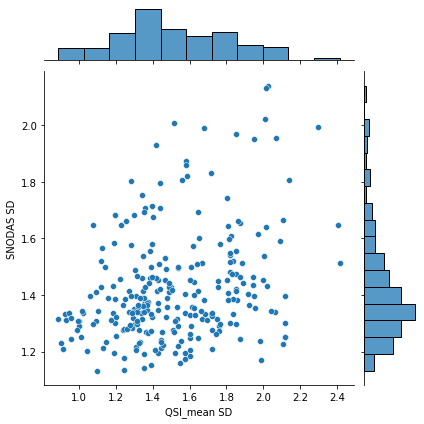

In [53]:
sns.jointplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20200218)

In [54]:
ttest_rel(USIDBN_20200218['QSI_mean SD'], USIDBN_20200218['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=4.940196272487226, pvalue=1.3956503349047645e-06)

In [55]:
USIDBN_20200218["QSI_mean SD"].corr(USIDBN_20200218["SNODAS SD"])

0.3130524861901257

## USIDBN_20210315

In [56]:
#read the file for each sites
USIDBN_20210315 = pd.read_csv("../data_results/snow_depth/extracted_values/USIDBN_20210315_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USIDBN_20210315["SNODAS SD"] = USIDBN_20210315["VALUE"] /1000
USIDBN_20210315 = USIDBN_20210315.drop("VALUE", axis = 1)
#rename columns
USIDBN_20210315.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select pixels with many representatives
USIDBN_20200218 = USIDBN_20210315[USIDBN_20210315["_count"] > 1500000]
USIDBN_20210315.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,3.030000e+02,303.000000,303.000000,303.000000
mean,2.166849e+06,1.479670,0.362935,1.441868
std,6.508443e+05,0.314182,0.149011,0.103503
min,2.800000e+01,0.723465,0.074341,1.212000
25%,2.376730e+06,1.255144,0.243142,1.366500
50%,2.455507e+06,1.431841,0.343519,1.438000
75%,2.461658e+06,1.677056,0.448378,1.495500
max,2.466398e+06,2.447898,1.052072,1.810000


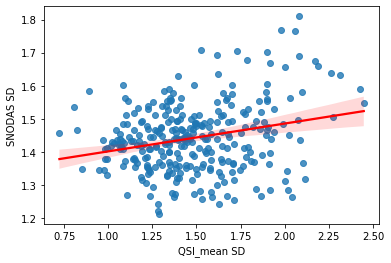

In [57]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20210315, line_kws={'color': 'red'})

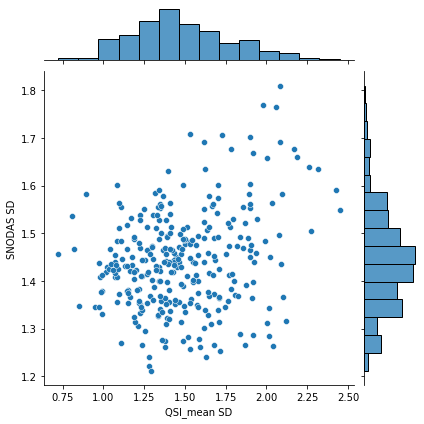

In [58]:
sns.jointplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20210315)

In [59]:
ttest_rel(USIDBN_20210315['QSI_mean SD'], USIDBN_20210315['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=2.159943670707646, pvalue=0.03156369704950796)

In [60]:
USIDBN_20210315["QSI_mean SD"].corr(USIDBN_20210315["SNODAS SD"])

0.25545128381538573

## USIDC_20200219

In [61]:
#read the file for each sites
USIDC_20200219 = pd.read_csv("../data_results/snow_depth/extracted_values/USIDDC_20200219_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USIDC_20200219["SNODAS SD"] = USIDC_20200219["VALUE"] /1000
USIDC_20200219 = USIDC_20200219.drop("VALUE", axis = 1)
#rename columns
USIDC_20200219.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select pixels wit many representatives
USIDC_202002198 = USIDC_20200219[USIDC_20200219["_count"] > 1500000]
USIDC_20200219.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,8.000000e+01,80.000000,80.000000,80.000000
mean,1.816551e+06,1.021395,0.307131,1.112413
std,8.543063e+05,0.361463,0.062897,0.291088
min,1.493800e+04,0.315044,0.128453,0.422000
25%,1.171562e+06,0.740489,0.267524,0.880000
50%,2.380402e+06,1.031177,0.310723,1.175500
75%,2.478620e+06,1.327791,0.341586,1.366500
max,2.485720e+06,1.655890,0.553445,1.549000


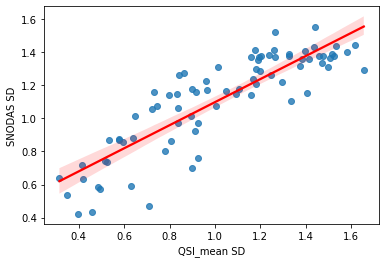

In [62]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDC_20200219, line_kws={'color': 'red'})

In [63]:
ttest_rel(USIDC_20200219['QSI_mean SD'], USIDC_20200219['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=-4.458837498014247, pvalue=2.6924411726330304e-05)

In [64]:
USIDC_20200219["QSI_mean SD"].corr(USIDC_20200219["SNODAS SD"])

0.865127770927834

## USIDMC_20200209

In [65]:
#read the file for each sites
USIDMC_20200209 = pd.read_csv("../data_results/snow_depth/extracted_values/USIDMC_20200209_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USIDMC_20200209["SNODAS SD"] = USIDMC_20200209["VALUE"] /1000
USIDMC_20200209 = USIDMC_20200209.drop("VALUE", axis = 1)
#rename columns
USIDMC_20200209.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select pixels wit many representatives
USIDMC_20200209 = USIDMC_20200209[USIDMC_20200209["_count"] > 1500000]
USIDMC_20200209.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,5.100000e+01,51.000000,51.000000,51.000000
mean,2.372824e+06,1.833378,0.332537,1.710431
std,2.548045e+05,0.235476,0.044367,0.185921
min,1.532650e+06,1.249242,0.242097,1.306000
25%,2.444078e+06,1.707751,0.300507,1.553000
50%,2.475738e+06,1.855953,0.327778,1.721000
75%,2.476404e+06,2.031589,0.351541,1.891500
max,2.477023e+06,2.216869,0.479794,2.017000


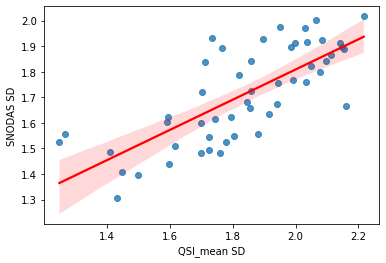

In [66]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDMC_20200209, line_kws={'color': 'red'})

In [67]:
ttest_rel(USIDMC_20200209['QSI_mean SD'], USIDMC_20200209['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=5.618900548193505, pvalue=8.506346558809568e-07)

In [68]:
USIDMC_20200209["QSI_mean SD"].corr(USIDMC_20200209["SNODAS SD"])

0.7491793399608005

## USIDMC_20210315

In [69]:
#read the file for each sites
USIDMC_20210315 = pd.read_csv("../data_results/snow_depth/extracted_values/USIDMC_20210315_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USIDMC_20210315["SNODAS SD"] = USIDMC_20210315["VALUE"] /1000
USIDMC_20210315 = USIDMC_20210315.drop("VALUE", axis = 1)
#rename columns
USIDMC_20210315.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select pixels wit many representatives
USIDMC_20210315 = USIDMC_20210315[USIDMC_20210315["_count"] > 1500000]
USIDMC_20210315.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,5.100000e+01,51.000000,51.000000,51.000000
mean,2.358444e+06,1.651813,0.391903,1.669725
std,2.543864e+05,0.320101,0.063651,0.102544
min,1.531781e+06,0.875863,0.291413,1.375000
25%,2.412032e+06,1.413092,0.351610,1.630000
50%,2.469101e+06,1.698218,0.390560,1.699000
75%,2.475440e+06,1.925704,0.428708,1.740500
max,2.476416e+06,2.164457,0.616961,1.819000


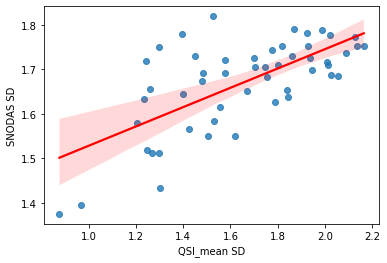

In [70]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDMC_20210315, line_kws={'color': 'red'})

In [71]:
ttest_rel(USIDMC_20210315['QSI_mean SD'], USIDMC_20210315['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=-0.4886524790651615, pvalue=0.6272242382633301)

In [72]:
USIDMC_20210315["QSI_mean SD"].corr(USIDMC_20210315["SNODAS SD"])

0.6770469066945743

## USUTLC_20210318

In [73]:
#read the file for each sites
USUTLC_20210318 = pd.read_csv("../data_results/snow_depth/extracted_values/USUTLC_20210318_SNODAS_QSI.csv", index_col="fid").dropna()
#rescaled the values
USUTLC_20210318["SNODAS SD"] = USUTLC_20210318["VALUE"] /1000
USUTLC_20210318 = USUTLC_20210318.drop("VALUE", axis = 1)
#rename columns
USUTLC_20210318.rename(columns= {"_mean": "QSI_mean SD", "_stdev": "QSI_stdev"}, inplace= True)
#select pixels wit many representatives
USUTLC_20210318 = USUTLC_20210318[USUTLC_20210318["_count"] > 1500000]
USUTLC_20210318.describe()

,_count,QSI_mean SD,QSI_stdev,SNODAS SD
count,4.000000e+01,40.000000,40.000000,40.000000
mean,2.416769e+06,1.835339,0.753058,1.603625
std,2.711758e+05,0.262212,0.253112,0.181543
min,1.660312e+06,1.350572,0.419282,0.995000
25%,2.380357e+06,1.678017,0.548346,1.548750
50%,2.543198e+06,1.824978,0.651854,1.649500
75%,2.599132e+06,1.955784,0.963126,1.729000
max,2.609736e+06,2.398476,1.376330,1.853000


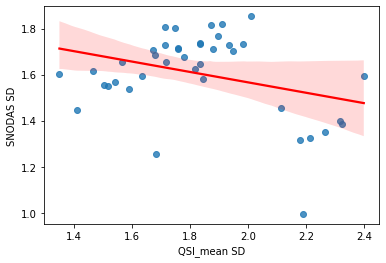

In [74]:
ax = sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USUTLC_20210318, line_kws={'color': 'red'})

In [75]:
ttest_rel(USUTLC_20210318['QSI_mean SD'], USUTLC_20210318['SNODAS SD'], nan_policy='omit')

Ttest_relResult(statistic=4.021867505731462, pvalue=0.0002565096275191241)

In [76]:
USUTLC_20210318["QSI_mean SD"].corr(USUTLC_20210318["SNODAS SD"])

-0.3262414857894278

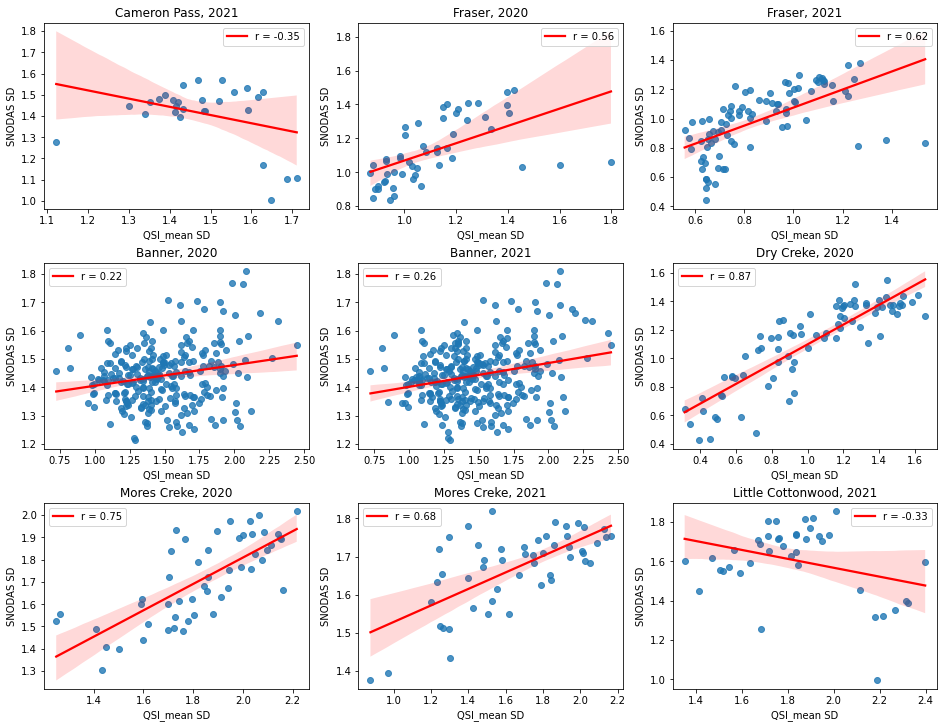

In [77]:
#all plots in one figure
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (13,10), constrained_layout = True)
#
sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USCOCP_20210319, line_kws={'color': 'red'}, ax = axs[0,0])
axs[0,0].set_title('Cameron Pass, 2021')
axs[0,0].legend(labels=["r = {:.2f}".format(USCOCP_20210319["QSI_mean SD"].corr(USCOCP_20210319["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20200211, line_kws={'color': 'red'}, ax = axs[0,1])
axs[0,1].set_title('Fraser, 2020')
axs[0,1].legend(labels=["r = {:.2f}".format(USCOFR_20200211["QSI_mean SD"].corr(USCOFR_20200211["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20210319, line_kws={'color': 'red'}, ax = axs[0,2])
axs[0,2].set_title('Fraser, 2021')
axs[0,2].legend(labels=["r = {:.2f}".format(USCOFR_20210319["QSI_mean SD"].corr(USCOFR_20210319["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20200218, line_kws={'color': 'red'}, ax = axs[1,0])
axs[1,0].set_title('Banner, 2020')
axs[1,0].legend(labels=["r = {:.2f}".format(USIDBN_20200218["QSI_mean SD"].corr(USIDBN_20200218["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20210315, line_kws={'color': 'red'}, ax = axs[1,1])
axs[1,1].set_title('Banner, 2021')
axs[1,1].legend(labels=["r = {:.2f}".format(USIDBN_20210315["QSI_mean SD"].corr(USIDBN_20210315["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDC_20200219, line_kws={'color': 'red'}, ax = axs[1,2])
axs[1,2].set_title('Dry Creke, 2020')
axs[1,2].legend(labels=["r = {:.2f}".format(USIDC_20200219["QSI_mean SD"].corr(USIDC_20200219["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDMC_20200209, line_kws={'color': 'red'}, ax = axs[2,0])
axs[2,0].set_title('Mores Creke, 2020')
axs[2,0].legend(labels=["r = {:.2f}".format(USIDMC_20200209["QSI_mean SD"].corr(USIDMC_20200209["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USIDMC_20210315, line_kws={'color': 'red'}, ax = axs[2,1])
axs[2,1].set_title('Mores Creke, 2021')
axs[2,1].legend(labels=["r = {:.2f}".format(USIDMC_20210315["QSI_mean SD"].corr(USIDMC_20210315["SNODAS SD"]))])

sns.regplot(x="QSI_mean SD", y="SNODAS SD", data=USUTLC_20210318, line_kws={'color': 'red'}, ax = axs[2,2])
axs[2,2].set_title('Little Cottonwood, 2021')
axs[2,2].legend(labels=["r = {:.2f}".format(USUTLC_20210318["QSI_mean SD"].corr(USUTLC_20210318["SNODAS SD"]))])

<AxesSubplot:title={'center':'Little Cottonwood, 2021'}, xlabel='QSI_mean SD', ylabel='SNODAS SD'>

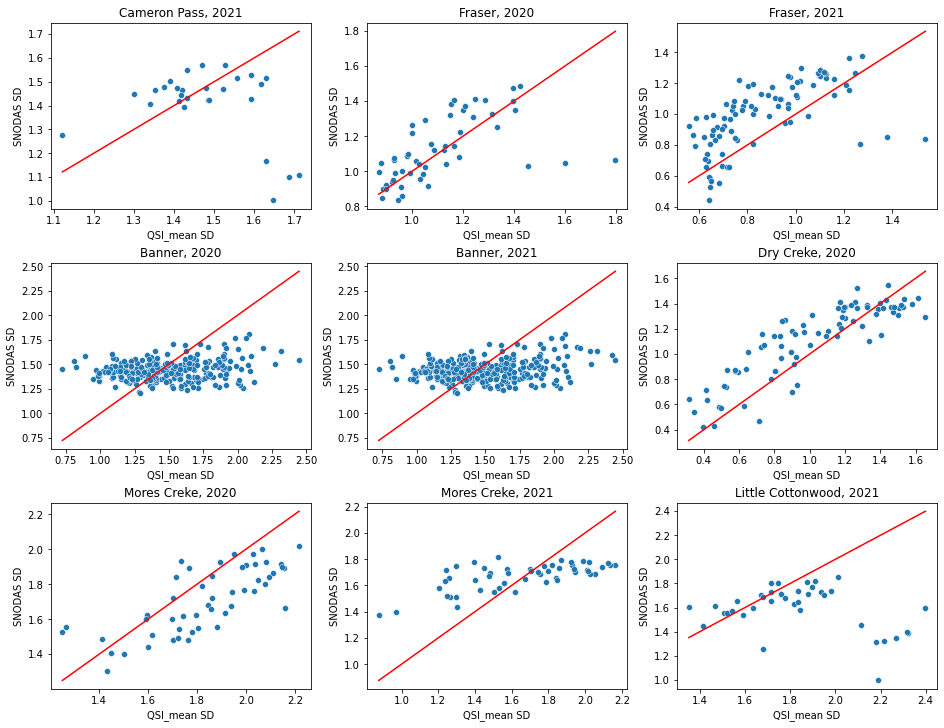

In [81]:
#all plots in one figure
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = (13,10), constrained_layout = True)

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USCOCP_20210319, ax = axs[0,0])
axs[0,0].set_title('Cameron Pass, 2021')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USCOCP_20210319, ax = axs[0,0], color = 'r')
#axs[0,0].legend(labels=["r = {:.2f}".format(USCOCP_20210319["QSI_mean SD"].corr(USCOCP_20210319["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20200211, ax = axs[0,1])
axs[0,1].set_title('Fraser, 2020')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USCOFR_20200211, ax = axs[0,1], color = 'r')
#axs[0,1].legend(labels=["r = {:.2f}".format(USCOFR_20200211["QSI_mean SD"].corr(USCOFR_20200211["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USCOFR_20210319, ax = axs[0,2])
axs[0,2].set_title('Fraser, 2021')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USCOFR_20210319, ax = axs[0,2], color = 'r')
#axs[0,2].legend(labels=["r = {:.2f}".format(USCOFR_20210319["QSI_mean SD"].corr(USCOFR_20210319["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20200218, ax = axs[1,0])
axs[1,0].set_title('Banner, 2020')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USIDBN_20200218, ax = axs[1,0], color = 'r')
#axs[1,0].legend(labels=["r = {:.2f}".format(USIDBN_20200218["QSI_mean SD"].corr(USIDBN_20200218["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USIDBN_20210315, ax = axs[1,1])
axs[1,1].set_title('Banner, 2021')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USIDBN_20210315, ax = axs[1,1], color = 'r')
#axs[1,1].legend(labels=["r = {:.2f}".format(USIDBN_20210315["QSI_mean SD"].corr(USIDBN_20210315["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USIDC_20200219, ax = axs[1,2])
axs[1,2].set_title('Dry Creke, 2020')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USIDC_20200219, ax = axs[1,2], color = 'r')
#axs[1,2].legend(labels=["r = {:.2f}".format(USIDC_20200219["QSI_mean SD"].corr(USIDC_20200219["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USIDMC_20200209, ax = axs[2,0])
axs[2,0].set_title('Mores Creke, 2020')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USIDMC_20200209, ax = axs[2,0], color = 'r')
#axs[2,0].legend(labels=["r = {:.2f}".format(USIDMC_20200209["QSI_mean SD"].corr(USIDMC_20200209["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USIDMC_20210315, ax = axs[2,1])
axs[2,1].set_title('Mores Creke, 2021')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USIDMC_20210315, ax = axs[2,1], color = 'r')
#axs[2,1].legend(labels=["r = {:.2f}".format(USIDMC_20210315["QSI_mean SD"].corr(USIDMC_20210315["SNODAS SD"]))])

sns.scatterplot(x="QSI_mean SD", y="SNODAS SD", data=USUTLC_20210318, ax = axs[2,2])
axs[2,2].set_title('Little Cottonwood, 2021')
sns.lineplot(x="QSI_mean SD", y="QSI_mean SD", data=USUTLC_20210318, ax = axs[2,2], color = 'r')
#axs[2,2].legend(labels=["r = {:.2f}".format(USUTLC_20210318["QSI_mean SD"].corr(USUTLC_20210318["SNODAS SD"]))])